## Metr-la Data

In [1]:
import h5py
f = h5py.File('D:/MIE1630/Data/nyc-bike.h5', 'r')


In [12]:
from data_loader import load_nycbike_data
train_ts_data, test_ts_data = load_nycbike_data()
train_ts_data += 1 - train_ts_data.min()  # Shift data to make it strictly positive
test_ts_data += 1 - test_ts_data.min() 

In [13]:
train_ts_data

2016-04-01 00:00:00    2
2016-04-01 00:30:00    1
2016-04-01 01:00:00    1
2016-04-01 01:30:00    1
2016-04-01 02:00:00    1
                      ..
2016-06-21 19:00:00    3
2016-06-21 19:30:00    9
2016-06-21 20:00:00    8
2016-06-21 20:30:00    2
2016-06-21 21:00:00    5
Freq: 30min, Length: 3931, dtype: int64

In [14]:
test_ts_data

2016-06-21 21:30:00    1
2016-06-21 22:00:00    2
2016-06-21 22:30:00    2
2016-06-21 23:00:00    8
2016-06-21 23:30:00    1
                      ..
2016-06-30 21:30:00    3
2016-06-30 22:00:00    2
2016-06-30 22:30:00    4
2016-06-30 23:00:00    4
2016-06-30 23:30:00    2
Freq: 30min, Length: 437, dtype: int64

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd
import numpy as np
alpha, beta, gamma = 0.5, 0.5, 0.5
# Seasonal period for daily seasonality
seasonal_periods = 336   # 24 hours × 2 intervals per hour

# Initialize and fit the model
model_hw = ExponentialSmoothing(
    train_ts_data,
    trend='mul',  # Or 'mul' if appropriate
    seasonal='mul',  # Or 'mul' if appropriate
    seasonal_periods=seasonal_periods
)

try:
    model_fit = model_hw.fit(optimized=True)
    forecast = model_fit.forecast(len(test_ts_data))
except ValueError as e:
    print(f"Model fitting failed: {e}")
    forecast = pd.Series([np.nan] * len(test_ts_data), index=test_ts_data.index)


ValueError: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.

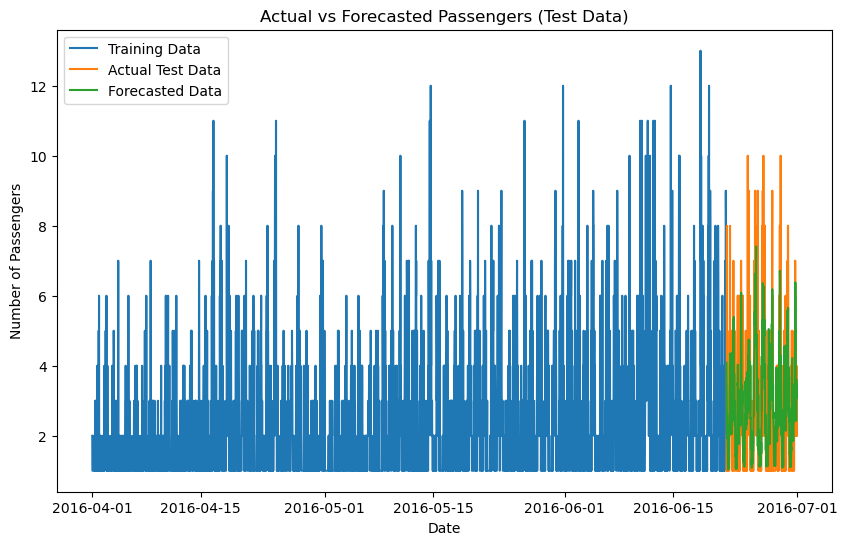

In [35]:
import matplotlib.pyplot as plt
# Plot the forecasts vs actuals
plt.figure(figsize=(10, 6))
plt.plot(train_ts_data.index, train_ts_data.values, label='Training Data')
plt.plot(test_ts_data.index, test_ts_data.values, label='Actual Test Data')
plt.plot(test_ts_data.index, forecast.values, label='Forecasted Data')
plt.title('Actual vs Forecasted Passengers (Test Data)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

## Forecasting using Holt-Winters

In [2]:
list(f.keys())


['adjacency_matrix', 'raw_data', 'time']

In [3]:
raw_data = f['raw_data']
raw_data.shape # (T, N, C) TimeSteps, # of variables, feature channels of dataset

(4368, 250, 2)

In [4]:
import h5py

# File path
file_path = 'D:/MIE1630/Data/nyc-bike.h5'

# Load the time series for one node
with h5py.File(file_path, 'r') as f:
    # Inspect datasets to find the relevant one
    datasets = list(f.keys())
    print("Datasets in the file:", datasets)
    
    # Assuming the dataset is named 'raw_data' (you may need to adjust this)
    raw_data = f['raw_data']
    
    # Select a single node (e.g., node 0)
    node_id = 0  # Adjust to the desired node index
    time_series = raw_data[:, node_id]  # All timesteps for the selected node
# Print the shape and a snippet of the extracted time series
print("Time series shape:", time_series.shape)
print("Time series data (first 10 points):", time_series[60:100])


Datasets in the file: ['adjacency_matrix', 'raw_data', 'time']
Time series shape: (4368, 2)
Time series data (first 10 points): [[0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 4]
 [3 2]
 [2 1]
 [0 0]
 [2 3]
 [3 4]
 [3 3]
 [2 1]
 [1 0]
 [4 5]
 [1 6]
 [2 4]
 [1 1]
 [4 2]
 [5 3]
 [2 1]
 [0 1]
 [3 1]
 [0 1]
 [0 0]
 [3 2]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]]


In [9]:
import pandas as pd
# Create a date index for the training data
# Assume the start date is January 1900
start_date = pd.to_datetime('2016-04-01')
freq = '30min'  # Monthly Start frequency
train_index = pd.date_range(start=start_date, periods=len(time_series), freq=freq)
train_ts = pd.Series(time_series, index=train_index)

In [27]:
time_series_sample.shape

(1, 250, 2)

In [ ]:
time_series_sample[]

(144, 1)
            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


<Axes: title={'center': 'Passengers Data'}, xlabel='Month'>

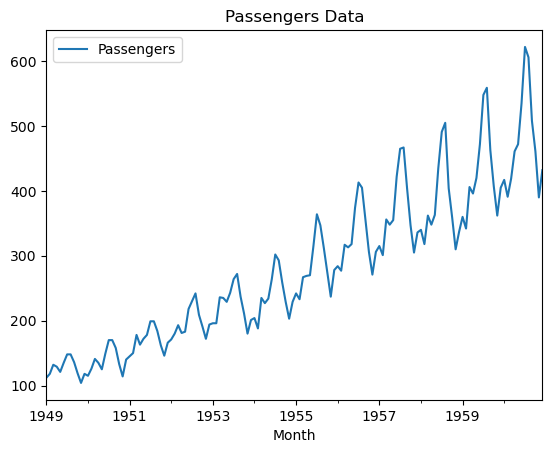

In [2]:
# dataframe opertations - pandas
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
airline = pd.read_csv(url,index_col='Month', parse_dates=True)
# finding shape of the dataframe
print(airline.shape)
# having a look at the data
print(airline.head())
# plotting the original data
airline[['Passengers']].plot(title='Passengers Data')

In [3]:
airline[['Passengers']]

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


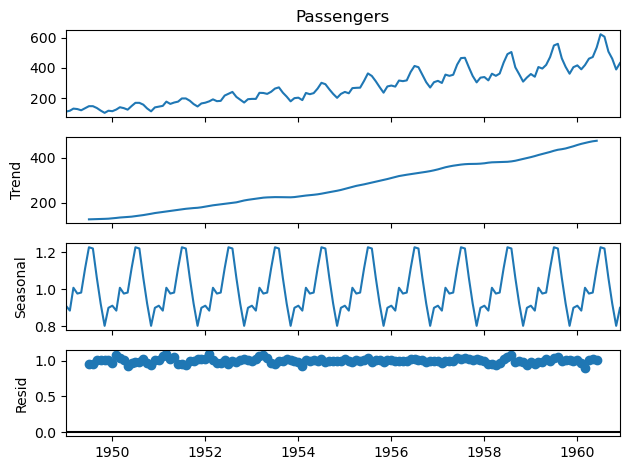

In [7]:
decompose_result = seasonal_decompose(airline['Passengers'],model='multiplicative')
decompose_result.plot();

In [9]:
# Set the frequency of the date time index as Monthly start as indicated by the data
airline.index.freq = 'MS'
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)

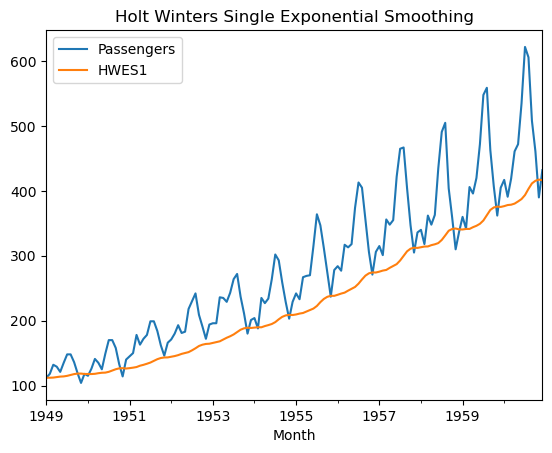

In [10]:
airline['HWES1'] = SimpleExpSmoothing(airline['Passengers']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
airline[['Passengers','HWES1']].plot(title='Holt Winters Single Exponential Smoothing');

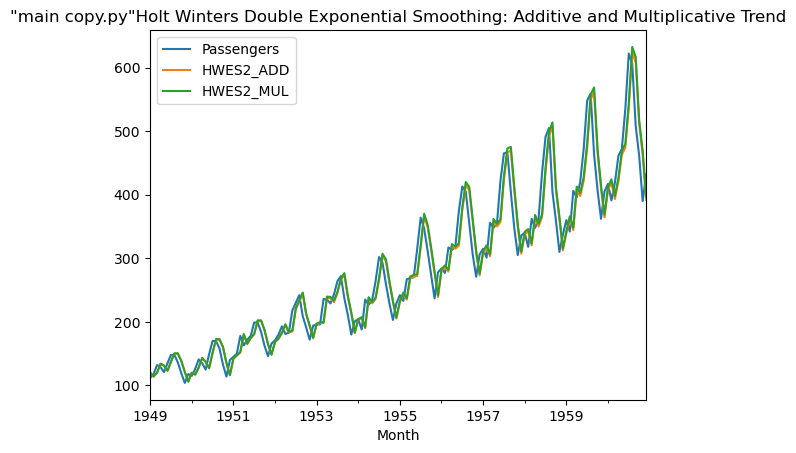

In [11]:
airline['HWES2_ADD'] = ExponentialSmoothing(airline['Passengers'],trend='add').fit().fittedvalues
airline['HWES2_MUL'] = ExponentialSmoothing(airline['Passengers'],trend='mul').fit().fittedvalues
airline[['Passengers','HWES2_ADD','HWES2_MUL']].plot(title='"main copy.py"Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend');

d:\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


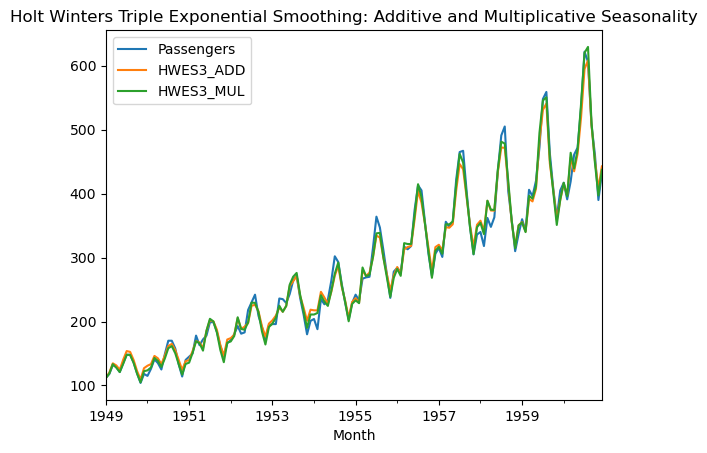

In [13]:
airline['HWES3_ADD'] = ExponentialSmoothing(airline['Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
airline['HWES3_MUL'] = ExponentialSmoothing(airline['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
airline[['Passengers','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');

In [15]:
forecast_data = pd.read_csv(url,index_col='Month', parse_dates=True)
forecast_data.index.freq = 'MS'
# Split into train and test set
train_airline = forecast_data[:120]
test_airline = forecast_data[120:]

d:\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

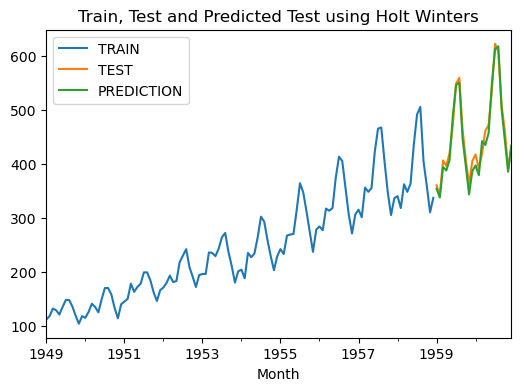

In [16]:
fitted_model = ExponentialSmoothing(train_airline['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(24)
train_airline['Passengers'].plot(legend=True,label='TRAIN')
test_airline['Passengers'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

<Axes: xlabel='Month'>

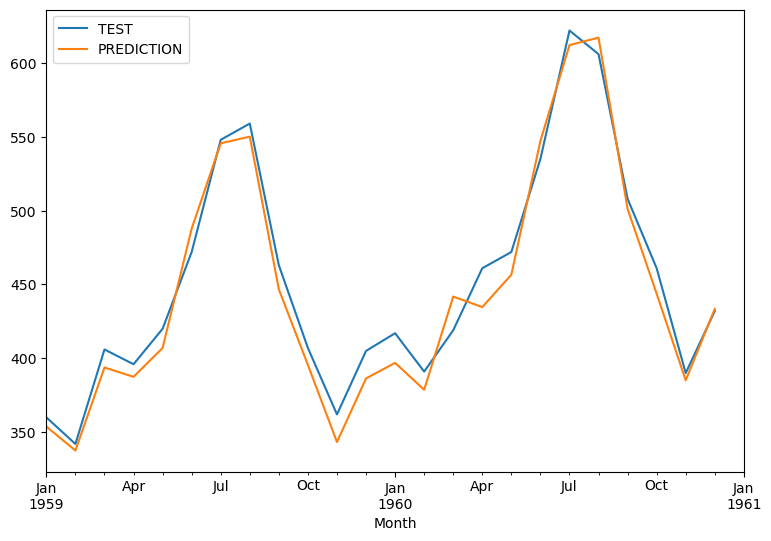

In [18]:
test_airline['Passengers'].plot(legend=True,label='TEST',figsize=(9,6))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1959-01-01','1961-01-01'])

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test_airline,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test_airline,test_predictions)}')

Mean Absolute Error = 12.380537449387745
Mean Squared Error = 192.61004182257628


## M4

In [22]:
from data_loader import load_m4_monthly_data
train_data, test_data = load_m4_monthly_data("M1")
train_data.isna

<bound method Series.isna of 1900-01-01    8000.0
1900-02-01    8350.0
1900-03-01    8570.0
1900-04-01    7700.0
1900-05-01    7080.0
               ...  
1938-09-01    5130.0
1938-10-01    5090.0
1938-11-01    5210.0
1938-12-01    4910.0
1939-01-01    6890.0
Freq: MS, Length: 469, dtype: float64>

In [23]:
train_data.isna()

1900-01-01    False
1900-02-01    False
1900-03-01    False
1900-04-01    False
1900-05-01    False
              ...  
1938-09-01    False
1938-10-01    False
1938-11-01    False
1938-12-01    False
1939-01-01    False
Freq: MS, Length: 469, dtype: bool

In [1]:
import pandas as pd
# Load the training data
train_df = pd.read_csv('D:/MIE1630/Data/Monthly-train.csv')

# Load the testing data
test_df = pd.read_csv('D:/MIE1630/Data/Monthly-test.csv')

# Assign column names
train_df.columns = ['ID'] + ['V'+str(i) for i in range(1, train_df.shape[1])]
test_df.columns = ['ID'] + ['V'+str(i) for i in range(1, test_df.shape[1])]

# Select a time series, e.g., the first one
ts_id = train_df.iloc[0]['ID']

# Get the training data for this time series
train_ts_data = train_df.iloc[0, 1:].dropna().values.astype(float)

# Get the testing data for this time series
test_ts_data = test_df.iloc[0, 1:].dropna().values.astype(float)


In [16]:
train_df.shape

(48000, 2795)

In [17]:
test_df.shape

(48000, 19)

In [18]:
# Number of periods in training data
n_train = len(train_ts_data)

# Create date range for training data
train_dates = pd.date_range(start='2000-01-01', periods=n_train, freq='MS')

# Create pandas Series with the dates
train_ts_series = pd.Series(train_ts_data, index=train_dates)

# Similarly for test data
n_test = len(test_ts_data)
test_dates = pd.date_range(start=train_dates[-1] + pd.offsets.MonthBegin(), periods=n_test, freq='MS')
test_ts_series = pd.Series(test_ts_data, index=test_dates)

# ts_data is the training data
ts_data = train_ts_series


In [19]:
len(train_ts_series)

469

In [20]:
test_ts_series

2039-02-01    8720.0
2039-03-01    7790.0
2039-04-01    4770.0
2039-05-01    5060.0
2039-06-01    4720.0
2039-07-01    4450.0
2039-08-01    5120.0
2039-09-01    5960.0
2039-10-01    6560.0
2039-11-01    4900.0
2039-12-01    4520.0
2040-01-01    7370.0
2040-02-01    9050.0
2040-03-01    7780.0
2040-04-01    5380.0
2040-05-01    4700.0
2040-06-01    4490.0
2040-07-01    4010.0
Freq: MS, dtype: float64

## Other